Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (1_synthesizer): TextureSynthesizer()
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (3_synthesizer): TextureSynthesizer()
  (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (6_synthesizer): TextureSynthesizer()
)
run [200]:
Loss : 1495.747559

run [400]:
Loss : 659.715576

run [600]:
Loss : 479.029846

run [800]:
Loss : 394.637329

run [1000]:
Loss : 344.366547

run [1200]:
Loss : 310.728271

run [1400]:
Loss : 289.061096

run [1600]:
Loss : 275.185181

run [1800]:
Loss : 265.171295

run [2000]:
Loss : 257.282288

torch.Size([1, 3, 100, 100])


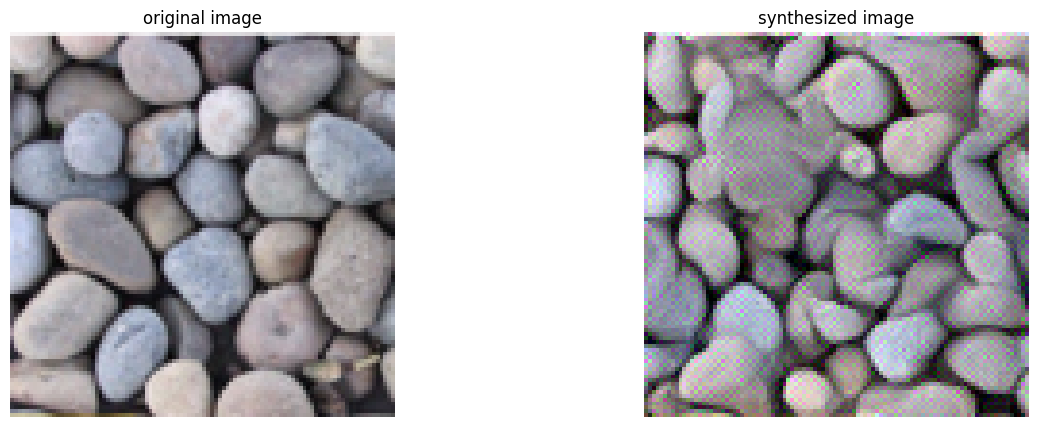

In [1]:
from synthesizer import run_texture_synthesis
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import synthesizer

synthesizer.TARGET_LAYERS = [1,3,6] # 1,6,11,20,29
synthesizer.IMAGE_SIZE = [100,100]
synthesizer.EPHOCS = 2000

texture = 'img.jpg'
texture_image_orig = Image.open(texture)
texture_image_orig = texture_image_orig.resize((synthesizer.IMAGE_SIZE[0], synthesizer.IMAGE_SIZE[1]))
to_tensor = transforms.ToTensor()

texture_image = to_tensor(texture_image_orig)
#change the tensor to 4D with batch size 1
texture_image = texture_image.unsqueeze(0)


synthesized_image = run_texture_synthesis(texture_image)
synthesized_image = synthesized_image.detach().squeeze(0).numpy().transpose(1, 2, 0)
synthesized_image = np.clip(synthesized_image, 0, 1)
# Display the original and synthesized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(texture_image_orig)
ax1.axis('off')
ax1.set_title('original image')
ax2.imshow(synthesized_image)
ax2.axis('off')
ax2.set_title('synthesized image')
plt.show()
